# Copenhagen Airbnb Data (March 25-April 24, 2019)

## - Data Munging, Exploratory Data Analysis and Pre-ML Feature Reduction - 

### Importing the packages

In [1]:
import warnings
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os 
from sklearn.preprocessing import LabelEncoder
from geopy.distance import great_circle
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")

### Importing the data 

In [2]:
os.chdir(r"C:\Users\aleen\Desktop\Data Science\Data Mining, Machine Learning, Deep Learning\Exam Project\Data\Detailed\Listings")

In [3]:
%timeit os.getcwd()   

344 ns ± 0.429 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [4]:
listdir = os.listdir() 
listdir

['airbnb_copenhagen_year',
 'Examen_Munging_Final.ipynb',
 'features_1.txt',
 'listings april.csv',
 'listings august.csv',
 'listings december.csv',
 'listings february.csv',
 'listings january.csv',
 'listings july.csv',
 'listings march.csv',
 'listings november.csv',
 'listings october.csv',
 'listings september.csv']

In [5]:
file_list = list()

for file in os.listdir():
    if file.endswith('.csv'):
        df = pd.read_csv(file)
        df['filename'] = file
        file_list.append(df)

all_listings = pd.concat(file_list, axis=0, ignore_index=True)

In [6]:
all_listings.calendar_last_scraped = pd.to_datetime(all_listings.calendar_last_scraped)
all_listings.month = [i.month for i in all_listings.calendar_last_scraped]
dummy_month = pd.get_dummies(all_listings.month)
all_listings = pd.concat([all_listings,dummy_month], axis=1)
all_listings.rename(columns={1: 'Jan', 2: 'Feb', 3:'Mar',4:'Apr',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}, inplace=True)

In [7]:
listings_august = pd.read_csv('listings august.csv')
listings_december = pd.read_csv('listings december.csv')
listings_february = pd.read_csv('listings february.csv')
listings_january = pd.read_csv('listings january.csv')
listings_july = pd.read_csv('listings july.csv')
listings_march = pd.read_csv('listings march.csv')
listings_november = pd.read_csv('listings november.csv')
listings_october = pd.read_csv('listings october.csv')
listings_september = pd.read_csv('listings september.csv')
listings_april = pd.read_csv('listings april.csv')

In [8]:
directory_name = r"C:\Users\aleen\Desktop\Data Science\Data Mining, Machine Learning, Deep Learning\Exam Project\Data\Detailed\Listings"

file_list = ['listings august.csv',
 'listings december.csv',
 'listings february.csv',
 'listings january.csv',
 'listings july.csv',
 'listings march.csv',
 'listings november.csv',
 'listings october.csv',
 'listings september.csv',
 'listings april.csv']

## Exploratory data analysis 

In [9]:
df = all_listings

In [10]:
from datetime import datetime
df.host_since = pd.to_datetime(df.host_since)

In [11]:
years = []
for i in df.host_since:
    #print(i.year)
    years.append(i.year)

In [12]:
df['host_years'] = years
df.host_years = 2019 - df.host_years
df['host_age'] = df.host_years

In [13]:
df = df.drop(['host_years','host_since'], axis=1)

In [14]:
df.describe()

,accommodates,availability_30,availability_365,availability_60,availability_90,bathrooms,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_entire_homes,...,Feb,Mar,Apr,Jul,Aug,Sep,Oct,Nov,Dec,host_age
count,262546.000000,262546.000000,262546.000000,262546.000000,262546.000000,262373.000000,262439.000000,262334.000000,262546.000000,105500.000000,...,262546.000000,262546.000000,262546.000000,262546.000000,262546.000000,262546.000000,262546.000000,262546.000000,262546.000000,262442.000000
mean,3.315156,3.444075,52.057262,7.831713,13.149075,1.067002,1.549122,2.176199,4.066701,3.615583,...,0.100302,0.100699,0.100786,0.101163,0.099800,0.098771,0.098825,0.099091,0.100516,4.281655
std,1.614797,7.543190,99.295503,16.054639,25.315612,0.272676,0.872784,1.517011,26.983244,25.451057,...,0.300403,0.300930,0.301046,0.301545,0.299733,0.298355,0.298427,0.298785,0.300687,1.770152
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,4.000000,2.000000,49.000000,6.000000,11.000000,1.000000,2.000000,3.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,16.000000,30.000000,365.000000,60.000000,90.000000,10.000000,8.000000,18.000000,290.000000,266.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000


### Column names

In [15]:
df.isnull().any()

access                                           True
accommodates                                    False
amenities                                       False
availability_30                                 False
availability_365                                False
availability_60                                 False
availability_90                                 False
bathrooms                                        True
bed_type                                        False
bedrooms                                         True
beds                                             True
calculated_host_listings_count                  False
calculated_host_listings_count_entire_homes      True
calculated_host_listings_count_private_rooms     True
calculated_host_listings_count_shared_rooms      True
calendar_last_scraped                           False
calendar_updated                                False
cancellation_policy                             False
city                        

## First feature selection

In [16]:
with open("features_1.txt") as f:
    features_1 = f.readlines()
features_1 = [x.strip() for x in features_1]
features_1

['id',
 'host_id',
 'host_location',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'zipcode',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'is_business_travel_ready',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'calculated_host_listings_count',


In [17]:
df_1 = df[features_1].set_index('id')
df_1.shape

(262546, 62)

### Some descriptive statistics

In [18]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262546 entries, 6983 to 28633865
Data columns (total 62 columns):
host_id                                         262546 non-null int64
host_location                                   261549 non-null object
host_response_time                              120900 non-null object
host_response_rate                              120901 non-null object
host_acceptance_rate                            0 non-null float64
host_is_superhost                               262442 non-null object
host_neighbourhood                              193347 non-null object
host_listings_count                             262442 non-null float64
host_total_listings_count                       262442 non-null float64
host_verifications                              262546 non-null object
host_has_profile_pic                            262442 non-null object
host_identity_verified                          262442 non-null object
zipcode                            

In [19]:
df_1.isna().sum()

host_id                                              0
host_location                                      997
host_response_time                              141646
host_response_rate                              141645
host_acceptance_rate                            262546
host_is_superhost                                  104
host_neighbourhood                               69199
host_listings_count                                104
host_total_listings_count                          104
host_verifications                                   0
host_has_profile_pic                               104
host_identity_verified                             104
zipcode                                           7364
latitude                                             0
longitude                                            0
property_type                                        0
room_type                                            0
accommodates                                         0
bathrooms 

In [20]:
df_1.describe()

,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,Feb,Mar,Apr,Jul,Aug,Sep,Oct,Nov,Dec,host_age
count,2.625460e+05,0.0,262442.000000,262442.000000,262546.000000,262546.000000,262546.000000,262373.000000,262439.000000,262334.000000,...,262546.000000,262546.000000,262546.000000,262546.000000,262546.000000,262546.000000,262546.000000,262546.000000,262546.000000,262442.000000
mean,5.147038e+07,NaN,4.342426,4.342426,55.681136,12.557691,3.315156,1.067002,1.549122,2.176199,...,0.100302,0.100699,0.100786,0.101163,0.099800,0.098771,0.098825,0.099091,0.100516,4.281655
std,5.508387e+07,NaN,27.947592,27.947592,0.018754,0.031130,1.614797,0.272676,0.872784,1.517011,...,0.300403,0.300930,0.301046,0.301545,0.299733,0.298355,0.298427,0.298785,0.300687,1.770152
min,5.130000e+02,NaN,0.000000,0.000000,55.615720,12.446786,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.088746e+07,NaN,1.000000,1.000000,55.666783,12.540035,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,3.078170e+07,NaN,1.000000,1.000000,55.682570,12.554286,3.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,7.329334e+07,NaN,1.000000,1.000000,55.696070,12.579450,4.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,2.576423e+08,NaN,294.000000,294.000000,55.736101,12.642094,16.000000,10.000000,8.000000,18.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000


## Data munging

In [21]:
# Filling Nans
df_1.extra_people.fillna('0.0', inplace=True)
df_1.extra_people.isna().sum()
#
df_1.extra_people = df_1.extra_people.str.replace('$', '').str.replace(',', '').astype(float)
df_1.extra_people.describe()

count    262546.000000
mean         62.506799
std         116.975960
min           0.000000
25%           0.000000
50%           0.000000
75%         100.000000
max        2000.000000
Name: extra_people, dtype: float64

In [22]:
# Filling Nans
df_1.cleaning_fee.fillna('0.0', inplace=True)
df_1.cleaning_fee.isna().sum()
# clean up the columns (by method chaining)
df_1.cleaning_fee = df_1.cleaning_fee.str.replace('$', '').str.replace(',', '').astype(float)
df_1.cleaning_fee.describe()

count    262546.000000
mean        199.697680
std         232.141927
min           0.000000
25%           0.000000
50%         150.000000
75%         300.000000
max        4300.000000
Name: cleaning_fee, dtype: float64

In [23]:
df_1.security_deposit.fillna('0.0', inplace=True)
df_1.security_deposit.isna().sum()
# clean up the columns (by method chaining)
df_1.security_deposit = df_1.security_deposit.str.replace('$', '').str.replace(',', '').astype(float)
df_1.security_deposit.describe()

count    262546.000000
mean        658.598855
std        2172.409967
min           0.000000
25%           0.000000
50%           0.000000
75%         648.000000
max       35263.000000
Name: security_deposit, dtype: float64

In [24]:
# Filling Nans
df_1.price.fillna('0.0', inplace=True)
df_1.price.isna().sum()
#
df_1.price = df_1.price.str.replace('$', '').str.replace(',', '').astype(float)
df_1['price'].describe()

count    262546.000000
mean        792.897896
std         828.687201
min           0.000000
25%         498.000000
50%         698.000000
75%         949.000000
max       67182.000000
Name: price, dtype: float64

In [25]:
#df_1.host_age = df_1.host_age.astype(float)
#df_1.host_age.fillna(0.0, inplace=True)

In [26]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262546 entries, 6983 to 28633865
Data columns (total 62 columns):
host_id                                         262546 non-null int64
host_location                                   261549 non-null object
host_response_time                              120900 non-null object
host_response_rate                              120901 non-null object
host_acceptance_rate                            0 non-null float64
host_is_superhost                               262442 non-null object
host_neighbourhood                              193347 non-null object
host_listings_count                             262442 non-null float64
host_total_listings_count                       262442 non-null float64
host_verifications                              262546 non-null object
host_has_profile_pic                            262442 non-null object
host_identity_verified                          262442 non-null object
zipcode                            

### Price

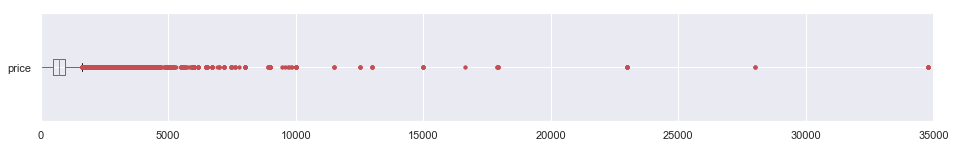

In [27]:
red = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
df_1['price'].plot(kind='box', xlim=(0, 35000), vert=False, flierprops=red, figsize=(16,2));

In [28]:
df_1.drop(df_1[ (df_1.price > 2000) | (df_1.price == 0) ].index, axis=0, inplace=True)

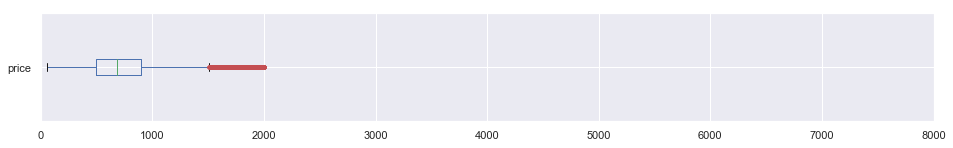

In [29]:
df_1['price'].plot(kind='box', xlim=(0, 8000), vert=False, flierprops=red, figsize=(16,2));

In [30]:
df_1['price'].describe()

count    255224.000000
mean        727.564488
std         330.047897
min          59.000000
25%         497.000000
50%         686.000000
75%         901.000000
max        2000.000000
Name: price, dtype: float64

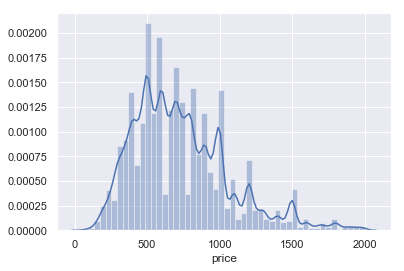

In [31]:
sns.distplot(df_1.price)

### Room type

In [32]:
df_1.room_type.value_counts(normalize=True)

Entire home/apt    0.833413
Private room       0.163507
Shared room        0.003080
Name: room_type, dtype: float64

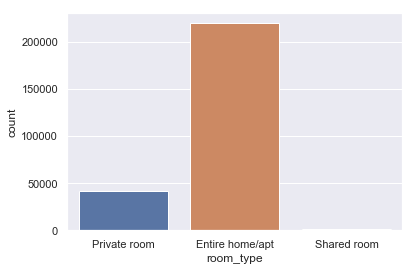

In [33]:
sns.countplot(x='room_type', data=df)

### Property type

In [34]:
df_1.property_type.value_counts(normalize=True)

Apartment                 0.841716
Condominium               0.061519
House                     0.045533
Townhouse                 0.016793
Serviced apartment        0.010791
Loft                      0.010226
Villa                     0.004522
Bed and breakfast         0.001783
Other                     0.000995
Bungalow                  0.000846
Guesthouse                0.000752
Guest suite               0.000744
Boat                      0.000697
Cabin                     0.000568
Hostel                    0.000556
Houseboat                 0.000513
Tiny house                0.000302
Tent                      0.000204
Camper/RV                 0.000180
Boutique hotel            0.000180
Hut                       0.000133
Cottage                   0.000114
Hotel                     0.000102
Casa particular (Cuba)    0.000071
Island                    0.000039
Earth house               0.000039
Chalet                    0.000027
Treehouse                 0.000027
Farm stay           

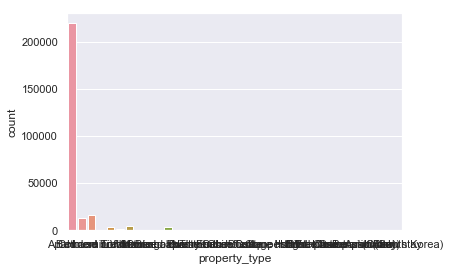

In [35]:
sns.countplot(x='property_type', data=df)

### Host response time

In [36]:
df_1.host_response_time.value_counts(normalize=True)
# Valori si pt naans 

within an hour        0.457274
within a day          0.272424
within a few hours    0.231121
a few days or more    0.039180
Name: host_response_time, dtype: float64

In [37]:
df_1.host_response_time.fillna('no response', inplace=True)
df_1.host_response_time.value_counts(normalize=True)
# Ft multe cu no response. Poate e reduntant 

no response           0.544091
within an hour        0.208476
within a day          0.124201
within a few hours    0.105370
a few days or more    0.017863
Name: host_response_time, dtype: float64

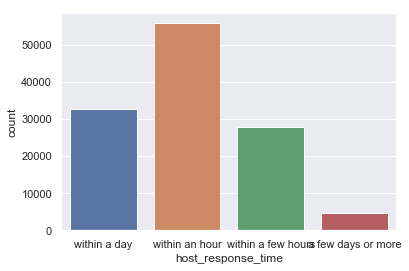

In [38]:
sns.countplot(x='host_response_time', data=df)

In [39]:
dummy1 = pd.get_dummies(df_1['host_response_time'])
df_1 = pd.concat([df_1,dummy1], axis=1)

### Host response rate

In [40]:
# Filling Nans
df_1.host_response_rate = df_1.host_response_rate.str.replace('%', '').astype(float)
df_1.host_response_rate = df_1.host_response_rate / 100
df_1.host_response_rate.fillna(0.0, inplace=True)
df_1.host_response_rate.value_counts(normalize=True)
# Valori si pt naans 

0.00    0.553443
1.00    0.355919
0.90    0.012969
0.80    0.010183
0.50    0.009858
0.67    0.007507
0.75    0.005336
0.60    0.004208
0.70    0.003805
0.83    0.003781
0.86    0.003048
0.88    0.002704
0.89    0.002472
0.99    0.002323
0.33    0.002202
0.98    0.002108
0.40    0.001822
0.97    0.001650
0.71    0.001332
0.25    0.001207
0.78    0.000995
0.92    0.000964
0.57    0.000717
0.91    0.000639
0.63    0.000635
0.94    0.000627
0.20    0.000596
0.96    0.000556
0.93    0.000549
0.30    0.000533
          ...   
0.53    0.000071
0.08    0.000071
0.76    0.000067
0.42    0.000063
0.58    0.000055
0.22    0.000055
0.13    0.000051
0.54    0.000047
0.68    0.000047
0.46    0.000047
0.36    0.000043
0.65    0.000039
0.74    0.000039
0.59    0.000035
0.09    0.000035
0.47    0.000027
0.28    0.000024
0.84    0.000024
0.27    0.000024
0.11    0.000016
0.61    0.000016
0.19    0.000012
0.31    0.000012
0.48    0.000012
0.23    0.000008
0.07    0.000004
0.18    0.000004
0.37    0.0000

### Superhost status

In [41]:
df_1.host_is_superhost.fillna('f', inplace=True)
df_1["host_is_superhost"] = df.host_is_superhost.map({"f": 0, "t": 1})
df_1.host_is_superhost.value_counts(normalize=True)

0.0    0.927624
1.0    0.072376
Name: host_is_superhost, dtype: float64

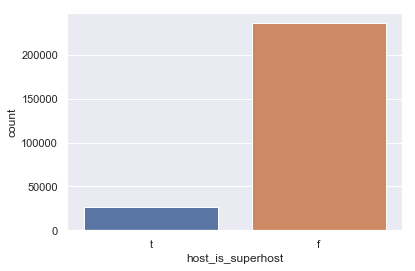

In [42]:
sns.countplot(x='host_is_superhost', data=df)

### Host listings

In [43]:
df_1.host_is_superhost.fillna(1.0, inplace=True)
df_1.host_listings_count.value_counts(normalize=True)
# Eliminam host total listings count ca e la fel 

1.0      0.822621
2.0      0.118834
3.0      0.025702
4.0      0.008122
5.0      0.002826
6.0      0.001979
256.0    0.001885
0.0      0.001337
8.0      0.001180
7.0      0.001113
294.0    0.001078
286.0    0.001066
283.0    0.001058
289.0    0.001058
275.0    0.001007
273.0    0.001003
258.0    0.000956
257.0    0.000956
9.0      0.000717
44.0     0.000706
43.0     0.000549
14.0     0.000502
10.0     0.000423
17.0     0.000376
13.0     0.000345
12.0     0.000341
15.0     0.000329
11.0     0.000239
26.0     0.000239
23.0     0.000220
24.0     0.000196
82.0     0.000145
34.0     0.000106
16.0     0.000098
18.0     0.000094
32.0     0.000086
19.0     0.000082
25.0     0.000059
22.0     0.000055
20.0     0.000055
60.0     0.000039
59.0     0.000039
77.0     0.000035
86.0     0.000024
177.0    0.000016
151.0    0.000016
126.0    0.000012
171.0    0.000008
47.0     0.000008
180.0    0.000008
172.0    0.000008
176.0    0.000008
169.0    0.000008
165.0    0.000008
21.0     0.000004
40.0     0

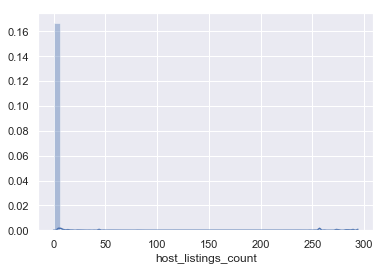

In [44]:
sns.distplot(df_1.host_listings_count)

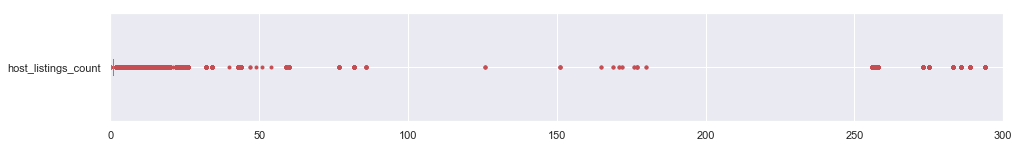

In [45]:
df_1['host_listings_count'].plot(kind='box', xlim=(0, 300), vert=False, flierprops=red, figsize=(16,2));

In [46]:
df_1.drop(df_1[ (df_1.host_listings_count > 50) | (df_1.host_listings_count == 0) ].index, axis=0, inplace=True)

### Host verifications

In [47]:
print(df_1.host_verifications.value_counts(normalize=True))
df_1.drop(['host_verifications'], axis=1)
# Probabil redundant 

['email', 'phone', 'reviews']                                                                                                              0.165381
['email', 'phone', 'reviews', 'jumio', 'government_id']                                                                                    0.163984
['email', 'phone', 'facebook', 'reviews']                                                                                                  0.084523
['email', 'phone']                                                                                                                         0.082029
['email', 'phone', 'facebook', 'reviews', 'jumio', 'government_id']                                                                        0.080251
['email', 'phone', 'reviews', 'jumio', 'offline_government_id', 'government_id']                                                           0.050491
['email', 'phone', 'facebook', 'reviews', 'jumio', 'offline_government_id', 'government_id']                    

,host_id,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,...,Sep,Oct,Nov,Dec,host_age,a few days or more,no response,within a day,within a few hours,within an hour
id,,,,,,,,,,,,,,,,,,,,,
6983,16774,"Copenhagen, Capital Region of Denmark, Denmark",no response,0.00,NaN,0.0,Nørrebro,1.0,1.0,t,...,0,0,0,0,10.0,0,1,0,0,0
29118,125230,"Copenhagen, Capital Region of Denmark, Denmark",within a day,1.00,NaN,0.0,Vesterbro,1.0,1.0,t,...,0,0,0,0,9.0,0,0,1,0,0
29618,127577,"Copenhagen, Capital Region of Denmark, Denmark",no response,0.00,NaN,0.0,Østerbro,1.0,1.0,t,...,0,0,0,0,9.0,0,1,0,0,0
31094,129976,"Copenhagen, Capital Region of Denmark, Denmark",no response,0.00,NaN,0.0,Vesterbro,1.0,1.0,t,...,0,0,0,0,9.0,0,1,0,0,0
32379,140105,"Copenhagen, Capital Region of Denmark, Denmark",within an hour,1.00,NaN,0.0,Vesterbro,4.0,4.0,t,...,0,0,0,0,9.0,0,0,0,0,1
32841,142143,"Copenhagen, Capital Region of Denmark, Denmark",no response,0.00,NaN,0.0,Østerbro,1.0,1.0,t,...,0,0,0,0,9.0,0,1,0,0,0
37159,160390,"Copenhagen, Capital Region of Denmark, Denmark",no response,0.00,NaN,0.0,Indre By,1.0,1.0,t,...,0,0,0,0,9.0,0,1,0,0,0
38524,165326,London,within a day,0.80,NaN,0.0,Frederiksberg,2.0,2.0,t,...,0,0,0,0,9.0,0,0,1,0,0
41105,178320,"Christianshavn, Capital Region of Denmark, Den...",no response,0.00,NaN,0.0,Christianshavn,1.0,1.0,t,...,0,0,0,0,9.0,0,1,0,0,0


### Profile picture

In [48]:
df_1.host_has_profile_pic.fillna('t', inplace=True)
#df_1["host_has_profile_pic"] = df.host_has_profile_pic.map({"f": 0, "t": 1})
df_1.host_has_profile_pic.value_counts(normalize=True)
# Ce facem cu nulls?

t    0.997725
f    0.002275
Name: host_has_profile_pic, dtype: float64

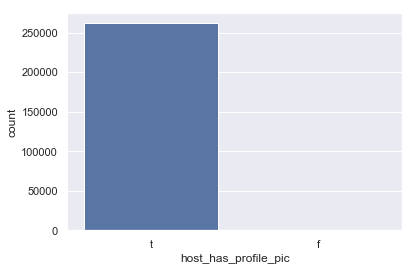

In [49]:
sns.countplot(x='host_has_profile_pic', data=df)

### Identity verification

In [50]:
df_1.host_identity_verified.fillna('f', inplace=True)
#df_1["host_identity_verified"] = df.host_identity_verified.map({"f": 0, "t": 1})
df_1.host_identity_verified.value_counts(normalize=True)
# Ce facem cu nulls?

f    0.583461
t    0.416539
Name: host_identity_verified, dtype: float64

### Zipcode

In [51]:
df_1.zipcode.value_counts(normalize=True)
# Aici datele sunt ampulea maxim. Trebuiesc curatate si avem si nulls. Probabil eliminam

2200      0.187542
2300      0.158024
2100      0.114387
2000      0.070852
2400      0.054498
2500      0.040153
2450      0.031254
2720      0.021721
2700      0.016987
1620      0.008226
1650      0.006335
1720      0.005183
1663      0.004722
1366      0.004607
1674      0.004521
2200.0    0.004485
2300.0    0.004403
1665      0.003970
1432      0.003827
1721      0.003329
1307      0.003325
1264      0.003272
2100.0    0.003182
1705      0.002949
1657      0.002941
1666      0.002847
1123      0.002761
2900      0.002724
1429      0.002696
1669      0.002688
            ...   
1357.0    0.000004
1356.0    0.000004
1957.0    0.000004
1958.0    0.000004
1959.0    0.000004
1576.0    0.000004
1315.0    0.000004
1317.0    0.000004
1916.0    0.000004
1673.0    0.000004
1568.0    0.000004
1911.0    0.000004
1878.0    0.000004
1439.0    0.000004
1160.0    0.000004
1161.0    0.000004
1164.0    0.000004
1552.0    0.000004
1166.0    0.000004
1905.0    0.000004
1172.0    0.000004
1717.0    0.

### Accomodates

In [52]:
df_1.accommodates.value_counts(normalize=True)

2     0.414137
4     0.243520
3     0.141287
5     0.074562
6     0.064907
1     0.034436
8     0.011636
7     0.011100
9     0.002056
10    0.001731
12    0.000389
11    0.000119
16    0.000079
14    0.000028
15    0.000012
Name: accommodates, dtype: float64

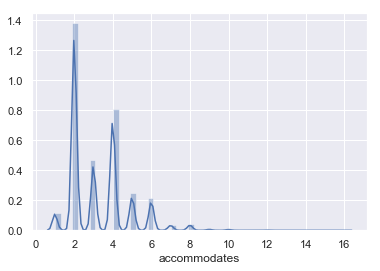

In [53]:
sns.distplot(df_1.accommodates)

### Bathrooms

In [54]:
# Trecem 0 pt nulls 
df_1.bathrooms.fillna(0.0, inplace=True)
# ce e cu valorile asstea dubioase?
# I guess .5 is shared 
df_1.bathrooms.value_counts(normalize=True)

1.0     0.909387
1.5     0.039109
2.0     0.036636
0.5     0.009711
2.5     0.002561
0.0     0.001481
3.0     0.000842
5.5     0.000079
4.0     0.000056
8.0     0.000040
7.5     0.000040
10.0    0.000040
3.5     0.000020
Name: bathrooms, dtype: float64

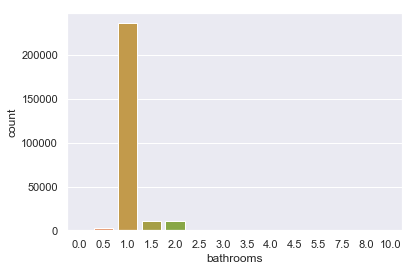

In [55]:
sns.countplot(x='bathrooms', data=df)

### Bedrooms

In [56]:
df_1.bedrooms.fillna(0.0, inplace=True)
df_1.bedrooms.value_counts(normalize=True)
# Avem deja 0 deci nulls...trecem tot la 0?

1.0    0.602477
2.0    0.250146
3.0    0.095798
4.0    0.024182
0.0    0.023145
5.0    0.003593
6.0    0.000580
7.0    0.000079
Name: bedrooms, dtype: float64

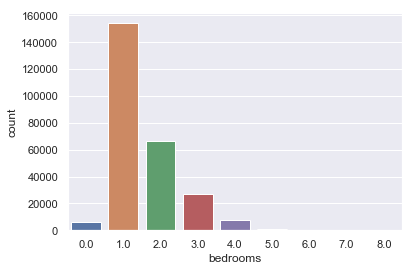

In [57]:
sns.countplot(x='bedrooms', data=df)

### Beds and bed types

In [58]:
df_1.beds.fillna(0.0, inplace=True)
df_1.beds.value_counts(normalize=True)
# Avem deja 0 deci nulls...trecem tot la 0?

1.0     0.450102
2.0     0.276880
3.0     0.107521
4.0     0.090716
5.0     0.035020
6.0     0.025242
7.0     0.006154
8.0     0.004693
0.0     0.001846
10.0    0.000869
9.0     0.000730
14.0    0.000067
11.0    0.000064
12.0    0.000064
16.0    0.000032
Name: beds, dtype: float64

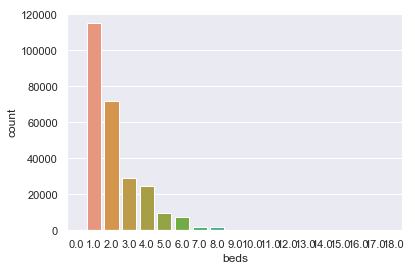

In [59]:
sns.countplot(x='beds', data=df)

In [60]:
df_1.bed_type.value_counts(normalize=True)
# No nulls 

Real Bed         0.982397
Pull-out Sofa    0.010215
Futon            0.004034
Couch            0.001914
Airbed           0.001441
Name: bed_type, dtype: float64

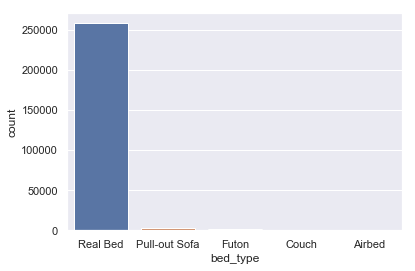

In [61]:
sns.countplot(x='bed_type', data=df)

### Amenities

In [62]:
df_1.amenities.value_counts(normalize=True)
# No nulls; probabil redundant 

{}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  0.002263
{TV,Internet,Wifi,Kitchen,"Buzzer/wireless intercom",Heating,"Family/kid friendly",Washer,Dryer,Essentials}                                                                                

### Surface (sqft)

In [63]:
df_1.square_feet.value_counts(normalize=True)
# Prea multe nulls. Trebuie eliminat 

0.0       0.220963
1076.0    0.033994
753.0     0.028565
861.0     0.028565
969.0     0.027856
1023.0    0.024315
646.0     0.023607
807.0     0.020066
161.0     0.019830
1399.0    0.018886
1184.0    0.018650
1615.0    0.018178
484.0     0.017705
1292.0    0.017469
915.0     0.017233
990.0     0.016289
538.0     0.014400
700.0     0.012276
883.0     0.011804
1507.0    0.011095
603.0     0.010387
151.0     0.009443
904.0     0.009443
1206.0    0.009443
936.0     0.009207
1345.0    0.008735
172.0     0.008499
129.0     0.007790
215.0     0.007790
775.0     0.007554
            ...   
2067.0    0.002361
1432.0    0.002361
1561.0    0.002361
37.0      0.002361
1733.0    0.002361
69.0      0.002361
50.0      0.001889
15.0      0.001889
1475.0    0.001889
570.0     0.001889
1442.0    0.001653
645.0     0.001653
65.0      0.001416
1050.0    0.001416
1163.0    0.001180
2422.0    0.001180
1636.0    0.001180
61.0      0.001180
76.0      0.000944
145.0     0.000944
1367.0    0.000944
60.0      0.

In [64]:
re_expression = r"(\d{2,3}\[sS]?squared?\smet..s|\d{2,3}\sS?[sqSQ].?m|\d{2,3}\s?[mM].?2|\d{2,3}\s?[mM]et..s\s[sS]quare.|\d{2,3}\s?[sS]quare.?m)"
# extract numbers 
import re
df['size'] = df['description'].str.extract(re_expression, expand=True)
df['size'] = df['size'].str.replace("\D", "")

# change datatype of size into float
df['size'] = df['size'].astype(float)

print('NaNs in size_column absolute:     ', df['size'].isna().sum())
print('NaNs in size_column in percentage:', round(df['size'].isna().sum()/len(df),3), '%')

print('NaNs in sqft absolute:     ', df['square_feet'].isna().sum())
print('NaNs in sqft in percentage:', round(df['square_feet'].isna().sum()/len(df),3), '%')

NaNs in size_column absolute:      208559
NaNs in size_column in percentage: 0.794 %
NaNs in sqft absolute:      258178
NaNs in sqft in percentage: 0.983 %


### Extra people

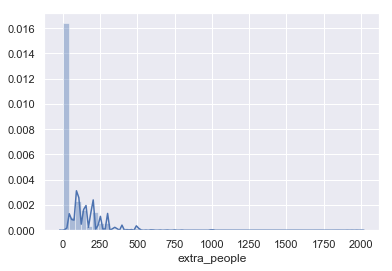

In [65]:
sns.distplot(df_1.extra_people)

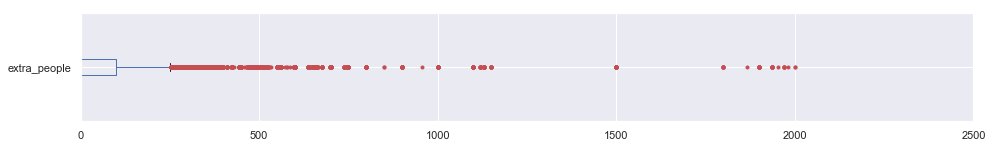

In [66]:
df_1['extra_people'].plot(kind='box', xlim=(0, 2500), vert=False, flierprops=red, figsize=(16,2));

In [67]:
df_1.drop(df_1[ (df_1.extra_people > 700)].index, axis=0, inplace=True)

### Security deposit

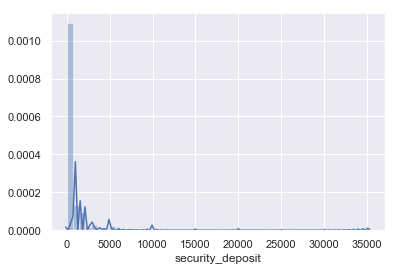

In [68]:
sns.distplot(df_1.security_deposit)

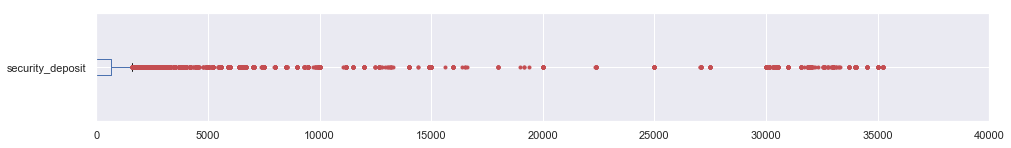

In [69]:
df_1['security_deposit'].plot(kind='box', xlim=(0, 40000), vert=False, flierprops=red, figsize=(16,2));

In [70]:
df_1.drop(df_1[ (df_1.security_deposit > 5000) ].index, axis=0, inplace=True)

### Cleaning fee

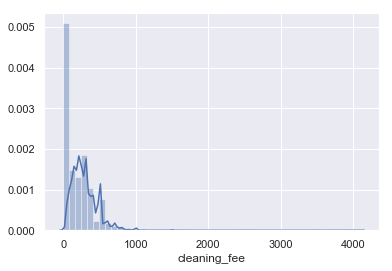

In [71]:
sns.distplot(df_1.cleaning_fee)

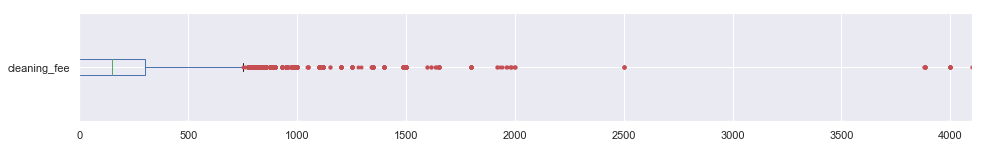

In [72]:
df_1['cleaning_fee'].plot(kind='box', xlim=(0, 4100), vert=False, flierprops=red, figsize=(16,2));

In [73]:
df_1.drop(df_1[ (df_1.cleaning_fee > 1000) ].index, axis=0, inplace=True)

### Guests included

In [74]:
df_1.guests_included.value_counts(normalize=True)

1     0.712831
2     0.189227
4     0.055043
3     0.025702
5     0.008883
6     0.006608
7     0.000790
8     0.000765
15    0.000041
11    0.000041
9     0.000024
10    0.000020
13    0.000012
12    0.000008
41    0.000004
Name: guests_included, dtype: float64

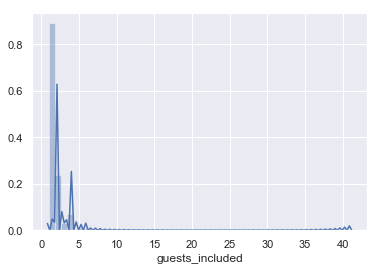

In [75]:
sns.distplot(df_1.guests_included)

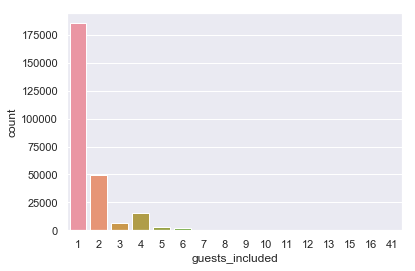

In [76]:
sns.countplot(x='guests_included', data=df)

### Minimum nights

In [77]:
df_1.minimum_nights.value_counts(normalize=True)

2       0.311577
3       0.227167
1       0.196715
4       0.106768
5       0.075974
7       0.032126
6       0.021749
10      0.006148
14      0.005781
30      0.003200
20      0.001633
8       0.001543
15      0.001128
12      0.000985
9       0.000867
21      0.000855
13      0.000550
90      0.000403
11      0.000338
25      0.000322
28      0.000273
29      0.000261
60      0.000224
100     0.000224
50      0.000220
40      0.000199
16      0.000175
19      0.000167
18      0.000159
22      0.000155
          ...   
360     0.000053
26      0.000049
17      0.000045
75      0.000045
430     0.000041
300     0.000041
42      0.000041
102     0.000041
92      0.000041
135     0.000041
1000    0.000041
51      0.000033
89      0.000033
1100    0.000033
130     0.000028
39      0.000028
58      0.000024
88      0.000020
54      0.000020
160     0.000020
59      0.000016
57      0.000012
183     0.000012
62      0.000008
37      0.000008
1124    0.000008
70      0.000004
168     0.0000

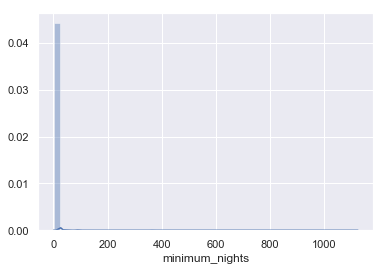

In [78]:
sns.distplot(df_1.minimum_nights)

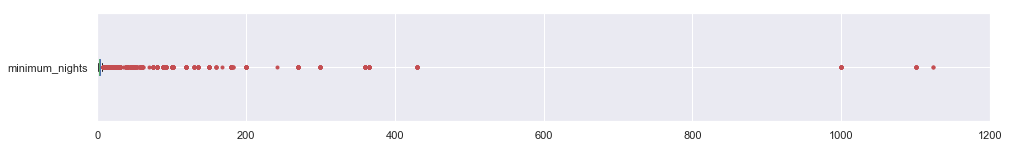

In [79]:
df_1['minimum_nights'].plot(kind='box', xlim=(0, 1200), vert=False, flierprops=red, figsize=(16,2));

In [80]:
df_1.drop(df_1[ (df_1.minimum_nights > 200) | (df_1.minimum_nights == 0) ].index, axis=0, inplace=True)

### Maximum nights

In [81]:
df_1.maximum_nights.value_counts(normalize=True)

1125    0.529281
14      0.071544
7       0.057431
30      0.051227
10      0.030670
21      0.026251
20      0.018981
8       0.013519
5       0.012802
6       0.011983
15      0.011633
1124    0.011531
60      0.011388
31      0.010403
12      0.009091
4       0.008989
3       0.007833
28      0.006993
9       0.006737
90      0.005743
25      0.005495
13      0.005372
40      0.004994
365     0.004766
16      0.004713
100     0.004427
2       0.003804
18      0.003540
35      0.003242
50      0.002933
          ...   
125     0.000033
1011    0.000033
160     0.000029
109     0.000029
364     0.000029
170     0.000029
215     0.000029
2000    0.000024
79      0.000024
73      0.000024
725     0.000020
1090    0.000020
136     0.000020
3000    0.000020
54      0.000020
175     0.000016
87      0.000016
3500    0.000016
366     0.000016
380     0.000016
122     0.000016
115     0.000012
84      0.000012
155     0.000008
370     0.000008
111     0.000008
320     0.000008
270     0.0000

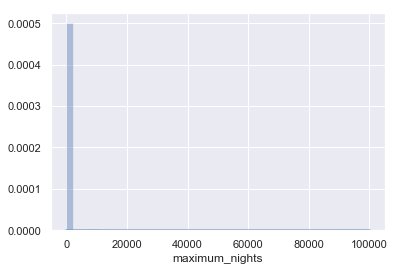

In [82]:
sns.distplot(df_1.maximum_nights)

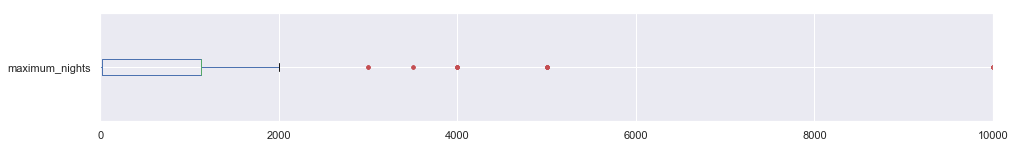

In [83]:
df_1['maximum_nights'].plot(kind='box', xlim=(0, 10000), vert=False, flierprops=red, figsize=(16,2));

### Number of reviews

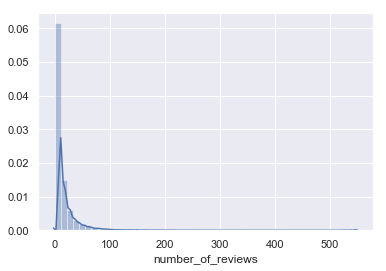

In [84]:
sns.distplot(df_1.number_of_reviews)

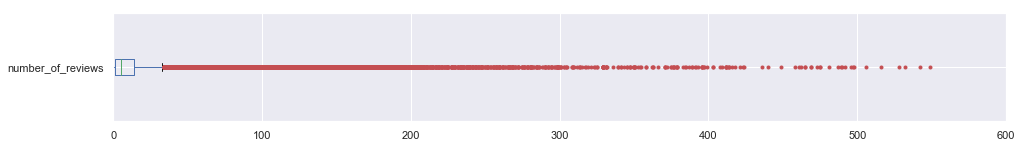

In [85]:
df_1['number_of_reviews'].plot(kind='box', xlim=(0, 600), vert=False, flierprops=red, figsize=(16,2));

### Review scores

In [86]:
df_1.review_scores_rating.value_counts(normalize=True)

100.0    0.326660
98.0     0.083223
96.0     0.073854
97.0     0.072923
93.0     0.069691
95.0     0.066948
90.0     0.056677
94.0     0.038693
80.0     0.037929
99.0     0.035176
92.0     0.029063
91.0     0.023201
87.0     0.018245
89.0     0.014792
88.0     0.012916
85.0     0.008039
84.0     0.005310
86.0     0.004842
60.0     0.004576
83.0     0.003936
70.0     0.002606
73.0     0.001813
82.0     0.001315
20.0     0.001064
40.0     0.000877
67.0     0.000808
75.0     0.000768
81.0     0.000665
77.0     0.000655
78.0     0.000557
76.0     0.000498
71.0     0.000330
79.0     0.000325
74.0     0.000182
50.0     0.000163
65.0     0.000158
72.0     0.000148
68.0     0.000084
53.0     0.000059
64.0     0.000054
66.0     0.000049
69.0     0.000039
30.0     0.000039
48.0     0.000020
55.0     0.000020
63.0     0.000010
Name: review_scores_rating, dtype: float64

In [87]:
df_1.review_scores_rating.isna().sum()

42505

In [88]:
# Trecem 0 pt nulls 
df_1.review_scores_rating.fillna(0.0, inplace=True)

In [89]:
df_1.review_scores_rating.value_counts(normalize=True)

100.0    0.270107
0.0      0.173127
98.0     0.068815
96.0     0.061068
97.0     0.060298
93.0     0.057626
95.0     0.055357
90.0     0.046865
94.0     0.031994
80.0     0.031363
99.0     0.029086
92.0     0.024031
91.0     0.019184
87.0     0.015087
89.0     0.012231
88.0     0.010680
85.0     0.006647
84.0     0.004391
86.0     0.004004
60.0     0.003784
83.0     0.003254
70.0     0.002155
73.0     0.001499
82.0     0.001088
20.0     0.000880
40.0     0.000725
67.0     0.000668
75.0     0.000635
81.0     0.000550
77.0     0.000542
78.0     0.000460
76.0     0.000411
71.0     0.000273
79.0     0.000269
74.0     0.000151
50.0     0.000134
65.0     0.000130
72.0     0.000122
68.0     0.000069
53.0     0.000049
64.0     0.000045
66.0     0.000041
69.0     0.000033
30.0     0.000033
48.0     0.000016
55.0     0.000016
63.0     0.000008
Name: review_scores_rating, dtype: float64

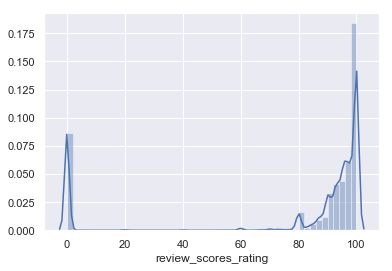

In [90]:
sns.distplot(df_1.review_scores_rating)

10.0    0.638167
0.0     0.174015
9.0     0.153425
8.0     0.025579
7.0     0.003499
6.0     0.003442
2.0     0.000766
4.0     0.000758
5.0     0.000314
3.0     0.000037
Name: review_scores_accuracy, dtype: float64


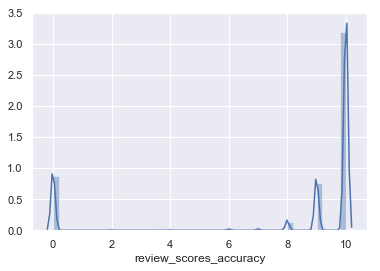

In [91]:
# Trecem 0 pt nulls 
df_1.review_scores_accuracy.fillna(0.0, inplace=True)
print(df_1.review_scores_accuracy.value_counts(normalize=True))
sns.distplot(df_1.review_scores_accuracy)

10.0    0.483170
9.0     0.237074
0.0     0.173892
8.0     0.075136
7.0     0.014940
6.0     0.010439
4.0     0.002089
5.0     0.001833
2.0     0.001377
3.0     0.000049
Name: review_scores_cleanliness, dtype: float64


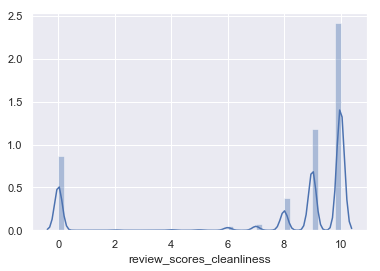

In [92]:
# Trecem 0 pt nulls 
df_1.review_scores_cleanliness.fillna(0.0, inplace=True)
print(df_1.review_scores_cleanliness.value_counts(normalize=True))
sns.distplot(df_1.review_scores_cleanliness)

10.0    0.708762
0.0     0.175065
9.0     0.093669
8.0     0.016687
7.0     0.002195
6.0     0.002179
4.0     0.000676
2.0     0.000619
5.0     0.000130
3.0     0.000016
Name: review_scores_checkin, dtype: float64


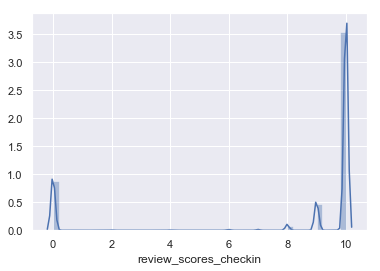

In [93]:
# Trecem 0 pt nulls 
df_1.review_scores_checkin.fillna(0.0, inplace=True)
print(df_1.review_scores_checkin.value_counts(normalize=True))
sns.distplot(df_1.review_scores_checkin)

10.0    0.730121
0.0     0.174230
9.0     0.077344
8.0     0.013054
6.0     0.002199
7.0     0.001784
2.0     0.000587
4.0     0.000472
5.0     0.000204
3.0     0.000004
Name: review_scores_communication, dtype: float64


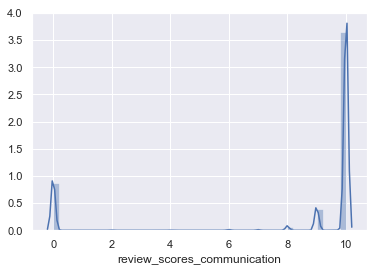

In [94]:
# Trecem 0 pt nulls 
df_1.review_scores_communication.fillna(0.0, inplace=True)
print(df_1.review_scores_communication.value_counts(normalize=True))
sns.distplot(df_1.review_scores_communication)

10.0    0.492921
9.0     0.269557
0.0     0.175188
8.0     0.052298
7.0     0.004786
6.0     0.004338
4.0     0.000472
2.0     0.000261
5.0     0.000151
3.0     0.000029
Name: review_scores_location, dtype: float64


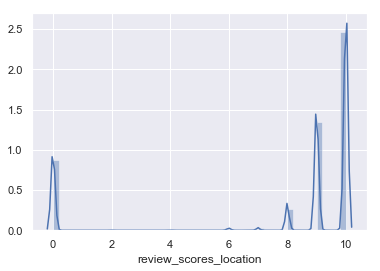

In [95]:
# Trecem 0 pt nulls 
df_1.review_scores_location.fillna(0.0, inplace=True)
print(df_1.review_scores_location.value_counts(normalize=True))
sns.distplot(df_1.review_scores_location)

10.0    0.449942
9.0     0.310658
0.0     0.175363
8.0     0.052355
7.0     0.005588
6.0     0.004391
2.0     0.000656
4.0     0.000607
5.0     0.000383
3.0     0.000057
Name: review_scores_value, dtype: float64


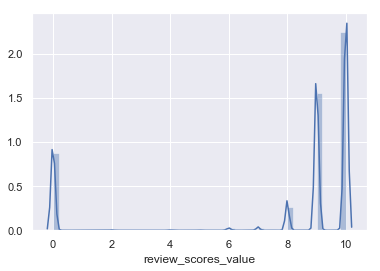

In [96]:
# Trecem 0 pt nulls 
df_1.review_scores_value.fillna(0.0, inplace=True)
print(df_1.review_scores_value.value_counts(normalize=True))
sns.distplot(df_1.review_scores_value)

### Instant bookable

In [97]:
df_1.instant_bookable.value_counts(normalize=True)

f    0.746931
t    0.253069
Name: instant_bookable, dtype: float64

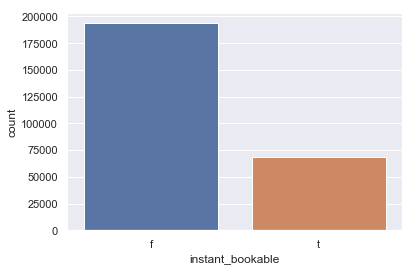

In [98]:
sns.countplot(x='instant_bookable', data=df)

### Is business travel ready?

In [99]:
df_1.is_business_travel_ready.value_counts(normalize=True)

f    1.0
Name: is_business_travel_ready, dtype: float64

### Cancellation policy

flexible                       0.438089
moderate                       0.329904
strict_14_with_grace_period    0.231987
super_strict_30                0.000020
Name: cancellation_policy, dtype: float64


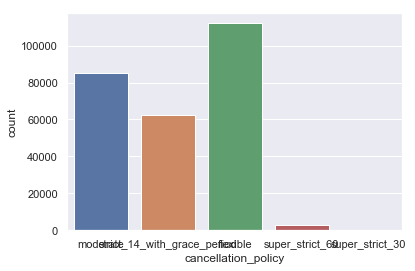

In [100]:
print(df_1.cancellation_policy.value_counts(normalize=True))
sns.countplot(x='cancellation_policy', data=df)

In [101]:
dummy2 = pd.get_dummies(df_1['cancellation_policy'])
df_1 = pd.concat([df_1,dummy2], axis=1)

## Guest requirements

### Requires guest profile picture?

f    0.993617
t    0.006383
Name: require_guest_profile_picture, dtype: float64


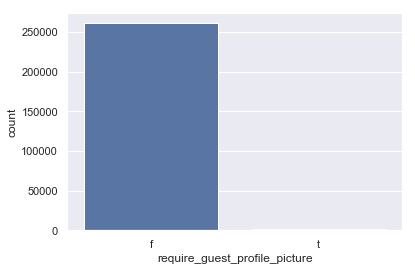

In [102]:
print(df_1.require_guest_profile_picture.value_counts(normalize=True))
sns.countplot(x='require_guest_profile_picture', data=df)

### Requires guest phone verification?

f    0.991842
t    0.008158
Name: require_guest_phone_verification, dtype: float64


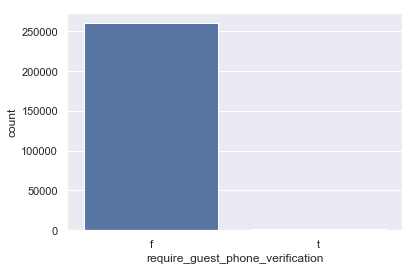

In [103]:
print(df_1.require_guest_phone_verification.value_counts(normalize=True))
sns.countplot(x='require_guest_phone_verification', data=df)

## Feature engineering

### How close is it to the center?

In [104]:
def distance_to_center(lat, lon):
    copenhagen_centre = (55.676098, 12.568337)
    accommodation = (lat, lon)
    return great_circle(copenhagen_centre, accommodation).km

In [105]:
df_1['distance_to_center'] = df_1.apply(lambda x: distance_to_center(x.latitude, x.longitude), axis=1)

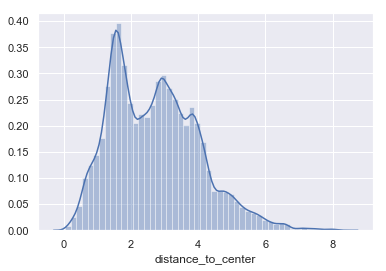

In [106]:
sns.distplot(df_1.distance_to_center)

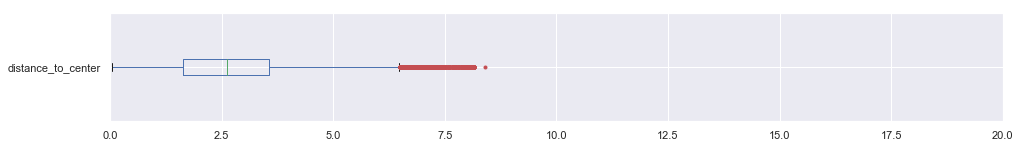

In [107]:
df_1['distance_to_center'].plot(kind='box', xlim=(0, 20), vert=False, flierprops=red, figsize=(16,2));

## Second feature selection

In [108]:
df_2 = df_1.drop(['weekly_price','monthly_price','reviews_per_month','square_feet',
                  'amenities','zipcode','host_total_listings_count', 'host_acceptance_rate','square_feet',
                 'host_location','host_neighbourhood',
                 'calculated_host_listings_count','calculated_host_listings_count_entire_homes',
                 'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms',
                 'host_is_superhost','maximum_nights','host_verifications',
                 'is_business_travel_ready', 'extra_people',
                 'require_guest_profile_picture','require_guest_phone_verification',
                 'latitude','longitude',
                 'host_response_time','cancellation_policy'], axis=1)
df_4 = df_1.drop([])

In [109]:
df_2.isna().sum()

host_id                          0
host_response_rate               0
host_listings_count            104
host_has_profile_pic             0
host_identity_verified           0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                        0
bedrooms                         0
beds                             0
bed_type                         0
price                            0
security_deposit                 0
cleaning_fee                     0
guests_included                  0
minimum_nights                   0
number_of_reviews                0
review_scores_rating             0
review_scores_accuracy           0
review_scores_cleanliness        0
review_scores_checkin            0
review_scores_communication      0
review_scores_location           0
review_scores_value              0
instant_bookable                 0
Jan                              0
Feb                              0
Mar                 

In [110]:
df_2.head()

,host_id,host_response_rate,host_listings_count,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,bathrooms,bedrooms,...,a few days or more,no response,within a day,within a few hours,within an hour,flexible,moderate,strict_14_with_grace_period,super_strict_30,distance_to_center
id,,,,,,,,,,,,,,,,,,,,,
6983,16774,0.0,1.0,t,f,Apartment,Private room,2,1.0,1.0,...,0,1,0,0,0,0,1,0,0,1.938488
29118,125230,1.0,1.0,t,f,Apartment,Entire home/apt,2,1.0,1.0,...,0,0,1,0,0,0,0,1,0,1.065984
29618,127577,0.0,1.0,t,t,Apartment,Entire home/apt,4,1.0,3.0,...,0,1,0,0,0,0,1,0,0,1.964055
31094,129976,0.0,1.0,t,f,Apartment,Entire home/apt,3,1.0,1.0,...,0,1,0,0,0,0,0,1,0,1.268696
32379,140105,1.0,4.0,t,f,Apartment,Entire home/apt,4,2.0,2.0,...,0,0,0,0,1,0,1,0,0,1.029972


In [111]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245514 entries, 6983 to 28633865
Data columns (total 47 columns):
host_id                        245514 non-null int64
host_response_rate             245514 non-null float64
host_listings_count            245410 non-null float64
host_has_profile_pic           245514 non-null object
host_identity_verified         245514 non-null object
property_type                  245514 non-null object
room_type                      245514 non-null object
accommodates                   245514 non-null int64
bathrooms                      245514 non-null float64
bedrooms                       245514 non-null float64
beds                           245514 non-null float64
bed_type                       245514 non-null object
price                          245514 non-null float64
security_deposit               245514 non-null float64
cleaning_fee                   245514 non-null float64
guests_included                245514 non-null int64
minimum_nights 

### Label encoding

In [112]:
labelencoder = LabelEncoder()

#### Binary

In [113]:
#df_2.host_has_profile_pic = labelencoder.fit_transform(df_2.host_has_profile_pic)
#df_2.host_identity_verified = labelencoder.fit_transform(df_2.host_identity_verified)
df_2.instant_bookable = labelencoder.fit_transform(df_2.instant_bookable)

#### Multiple label

In [114]:
#df_2.host_response_time = labelencoder.fit_transform(df_2.host_response_time)
df_2.property_type = labelencoder.fit_transform(df_2.property_type)
df_2.room_type = labelencoder.fit_transform(df_2.room_type)
df_2.bed_type = labelencoder.fit_transform(df_2.bed_type)
#df_2.cancellation_policy = labelencoder.fit_transform(df_2.cancellation_policy)

In [115]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245514 entries, 6983 to 28633865
Data columns (total 47 columns):
host_id                        245514 non-null int64
host_response_rate             245514 non-null float64
host_listings_count            245410 non-null float64
host_has_profile_pic           245514 non-null object
host_identity_verified         245514 non-null object
property_type                  245514 non-null int32
room_type                      245514 non-null int32
accommodates                   245514 non-null int64
bathrooms                      245514 non-null float64
bedrooms                       245514 non-null float64
beds                           245514 non-null float64
bed_type                       245514 non-null int32
price                          245514 non-null float64
security_deposit               245514 non-null float64
cleaning_fee                   245514 non-null float64
guests_included                245514 non-null int64
minimum_nights    

### Third feature selection 

In [116]:
df_3 = df_2.drop(['host_id','host_response_rate','host_listings_count','host_has_profile_pic',
                  'property_type','room_type','room_type', 'bed_type','minimum_nights',
                 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                   'review_scores_communication', 'review_scores_location',
                   'review_scores_value'], axis=1)

In [117]:
df_3.rename(columns={'a few days or more': 'a_few_days', 'no response': 'no_response',
                     'within a day':'within_a_day', 'within a few hours':'within_a_few_hours',
                     'within an hour':'within_an_hour'}, inplace=True)

In [118]:
df_3.host_age = df_3.host_age.astype(float)
df_3.host_age

id
6983        10.0
29118        9.0
29618        9.0
31094        9.0
32379        9.0
32841        9.0
37159        9.0
41105        9.0
45794        9.0
49122        9.0
53776        9.0
55465        9.0
60048        9.0
61546        9.0
65902        9.0
69210        9.0
70768        9.0
75158        9.0
78381        8.0
96080        8.0
104280       8.0
104281       8.0
112292       8.0
117702       8.0
118649       8.0
118971       8.0
119322       8.0
130130       8.0
131263       8.0
135777       8.0
            ... 
28580260     2.0
28581772     1.0
28582848     6.0
28583518     1.0
28593100     1.0
28593366     3.0
28594943     1.0
28597438     3.0
28599035     5.0
28599822     1.0
28606593     1.0
28607022     1.0
28607758     5.0
28609630     5.0
28618851     1.0
28620677     5.0
28621813     4.0
28621895     1.0
28624823     4.0
28624874     8.0
28625152     1.0
28625446     2.0
28625530     1.0
28625685     1.0
28627948     3.0
28628167     3.0
28628664     5.0
28631747   

In [119]:
df_3.host_age

id
6983        10.0
29118        9.0
29618        9.0
31094        9.0
32379        9.0
32841        9.0
37159        9.0
41105        9.0
45794        9.0
49122        9.0
53776        9.0
55465        9.0
60048        9.0
61546        9.0
65902        9.0
69210        9.0
70768        9.0
75158        9.0
78381        8.0
96080        8.0
104280       8.0
104281       8.0
112292       8.0
117702       8.0
118649       8.0
118971       8.0
119322       8.0
130130       8.0
131263       8.0
135777       8.0
            ... 
28580260     2.0
28581772     1.0
28582848     6.0
28583518     1.0
28593100     1.0
28593366     3.0
28594943     1.0
28597438     3.0
28599035     5.0
28599822     1.0
28606593     1.0
28607022     1.0
28607758     5.0
28609630     5.0
28618851     1.0
28620677     5.0
28621813     4.0
28621895     1.0
28624823     4.0
28624874     8.0
28625152     1.0
28625446     2.0
28625530     1.0
28625685     1.0
28627948     3.0
28628167     3.0
28628664     5.0
28631747   

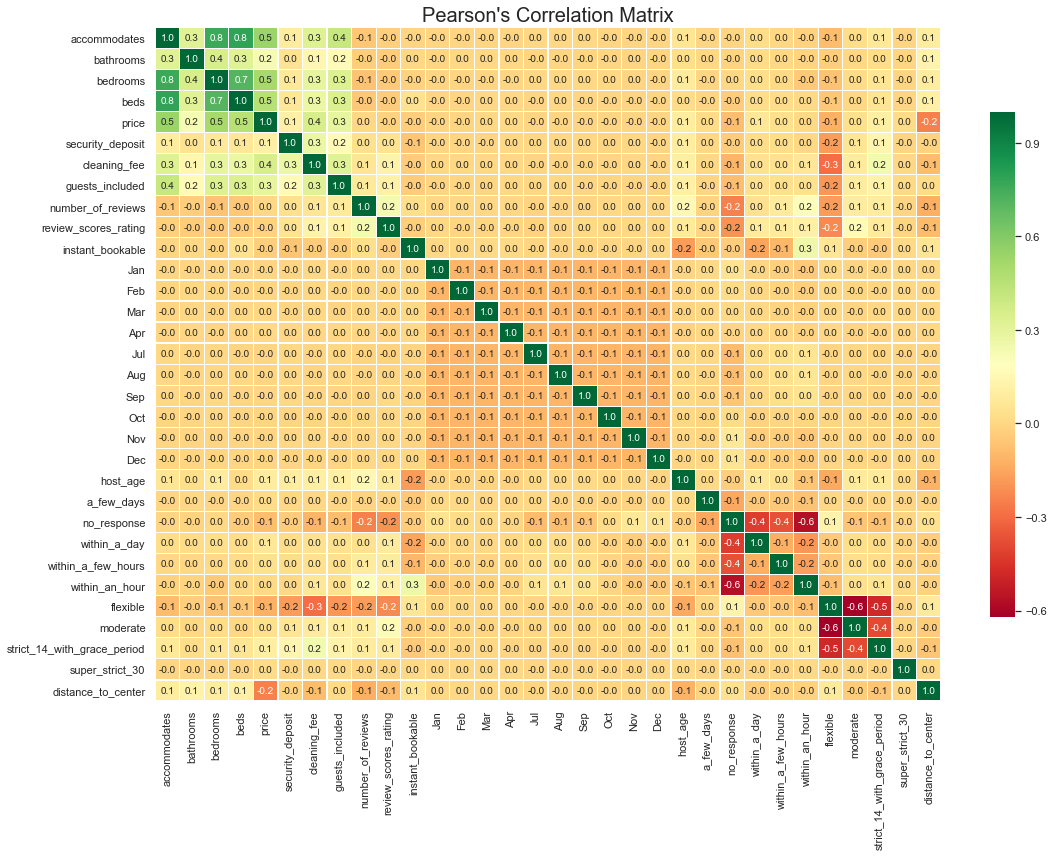

In [120]:
#correlation map to see correlation between variables
f,ax = plt.subplots(figsize=(16, 12))
plt.title("Pearson's Correlation Matrix", fontsize=20)
sns.heatmap(df_3.corr(), annot=True, linewidths=.25, fmt= '.1f', ax=ax, vmax=1.0, cbar_kws={"shrink": .75}, cmap="RdYlGn")
f.tight_layout()

In [126]:
df_3.drop(df_3[ (df_3.host_age.isna())].index, axis=0, inplace=True)

In [128]:
df_3.to_csv('airbnb_copenhagen_year', encoding='utf-8')